# Initialize

In [1]:
%cd ".."
# %cd /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics

/local_data/teo_fs_fast/rtorre/cernbox/ML/TwoSampleTests/GitHub/GenerativeModelsMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-08-01 15:27:00.025764: Importing os...
2024-08-01 15:27:00.025834: Importing sys...
Visible devices: [0]
2024-08-01 15:27:00.025957: Importing timer from timeit...
2024-08-01 15:27:00.025992: Setting env variables for tf import (only device(s) [0] will be available)...
2024-08-01 15:27:00.026056: Importing numpy...
2024-08-01 15:27:00.106063: Importing matplotlib...


2024-08-01 15:27:00.269376: Importing h5py...
2024-08-01 15:27:00.280671: Importing importlib.util...
2024-08-01 15:27:00.280729: Importing json...
2024-08-01 15:27:00.280763: Importing pandas...
2024-08-01 15:27:00.457471: Importing random...
2024-08-01 15:27:00.457543: Importing scipy utils...
2024-08-01 15:27:00.646065: Importing subprocess...
2024-08-01 15:27:00.646183: Importing tensorflow...
Tensorflow version: 2.12.0
2024-08-01 15:27:01.886061: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-08-01 15:27:02.025471: Importing timeit...
2024-08-01 15:27:02.025531: Importing tqdm...
2024-08-01 15:27:02.027192: Importing typing...
2024-08-01 15:27:02.027250: Setting tf configs...
2024-08-01 15:27:02.077724: Importing GMetrics module...
2024-08-01 15:27:04.092869: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA L40S
Loaded 1 GPUs: ['NVIDIA L40S']
Model directory exists
2024-08-01 15:27:04.142775: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[ 1.16219879 -2.23355877 -2.20074354  5.13001852  1.32076395]
 [-2.52951149 -0.85963791 -1.86490016  1.34132483 -0.66278098]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[ 1.16219879 -2.23355877 -2.20074354  5.13001852  1.32076395]
 [-2.52951149 -0.85963791 -1.86490016  1.34132483 -0.66278098]], shape=(2, 5), dtype=float64)


## Deformations

### 1 - $\mu$-deformation

In [4]:
eps = 0.5
dist_def_1 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "mean",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.06211247714236379 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.06173818977549672 s.
Computing HPD intervals...
HPD intervals computed in 6.3937472347170115 s.
Computing HPD quotas...
HPD quotas computed in 4.135995870921761 s.
Plotting corner plot...


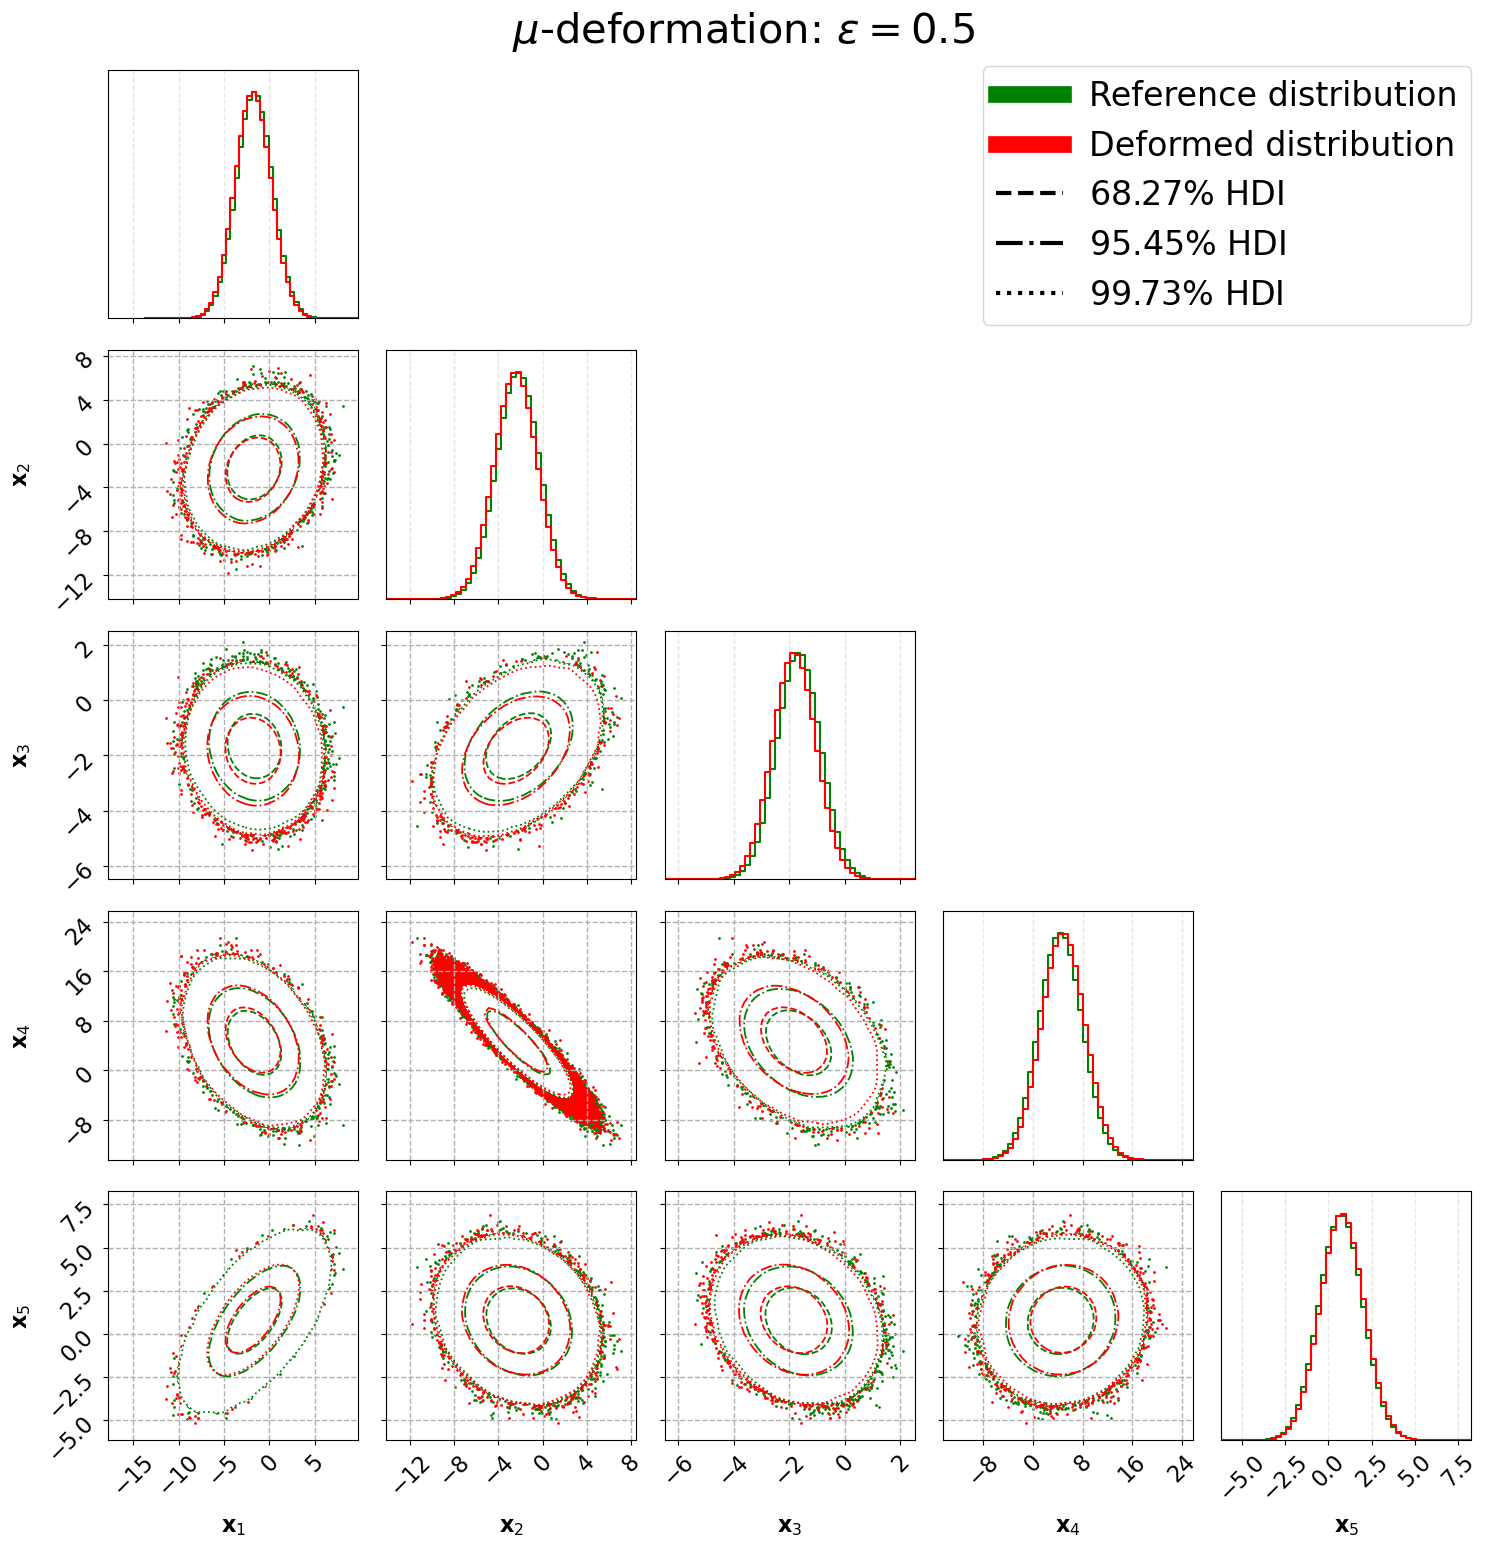

Plot done and saved in 23.55429056007415 s.


In [5]:
plot_corners(dist_1,
             dist_def_1,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mu$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_1.png",
             save = True,
             show = True)

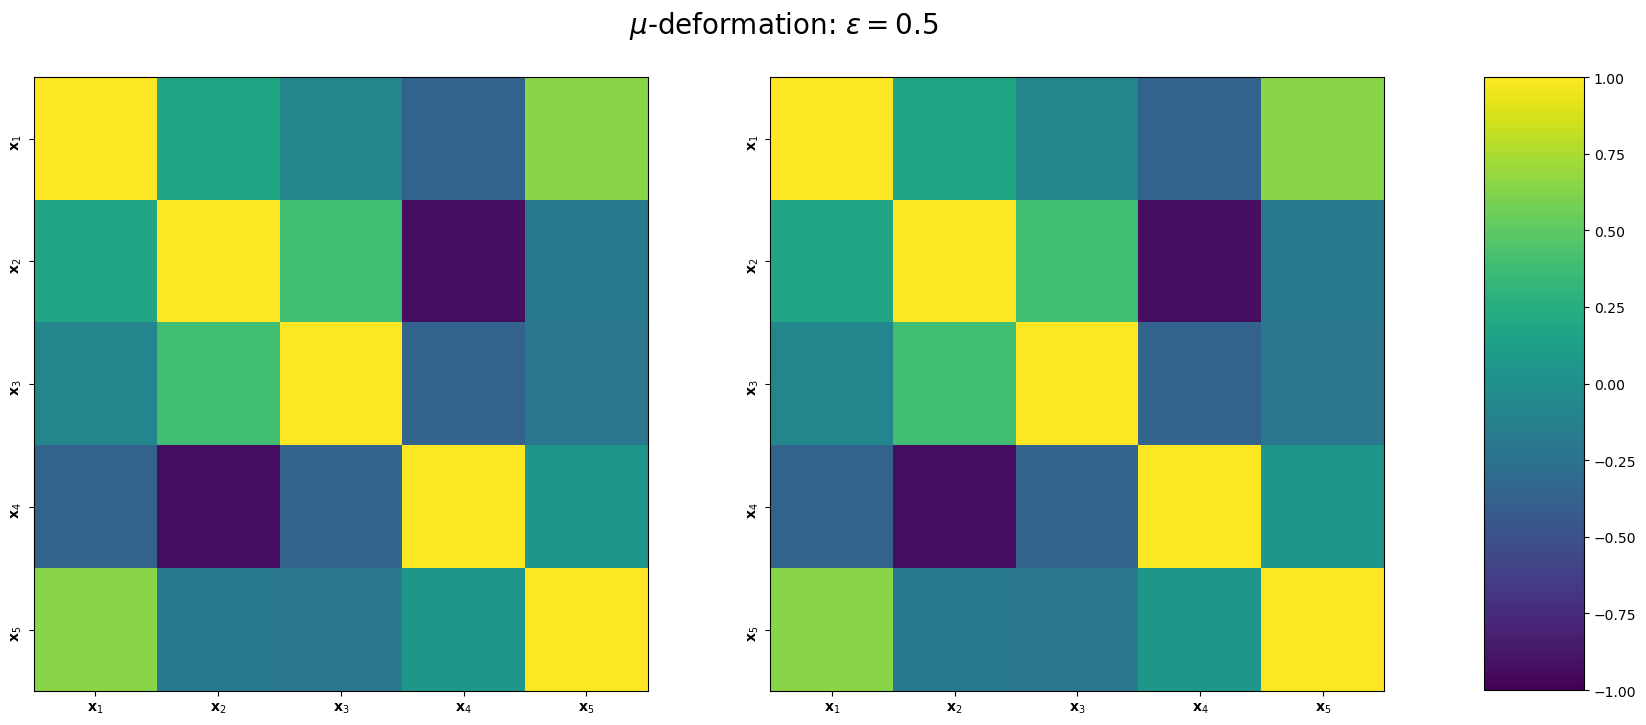

In [6]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_1, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_1.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mu$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 2 - $\Sigma_{ij}$-deformation

In [7]:
eps = 0.5
dist_def_2 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_diag",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.019335587974637747 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.02593873906880617 s.
Computing HPD intervals...


HPD intervals computed in 6.461227041203529 s.
Computing HPD quotas...
HPD quotas computed in 2.851671718992293 s.
Plotting corner plot...


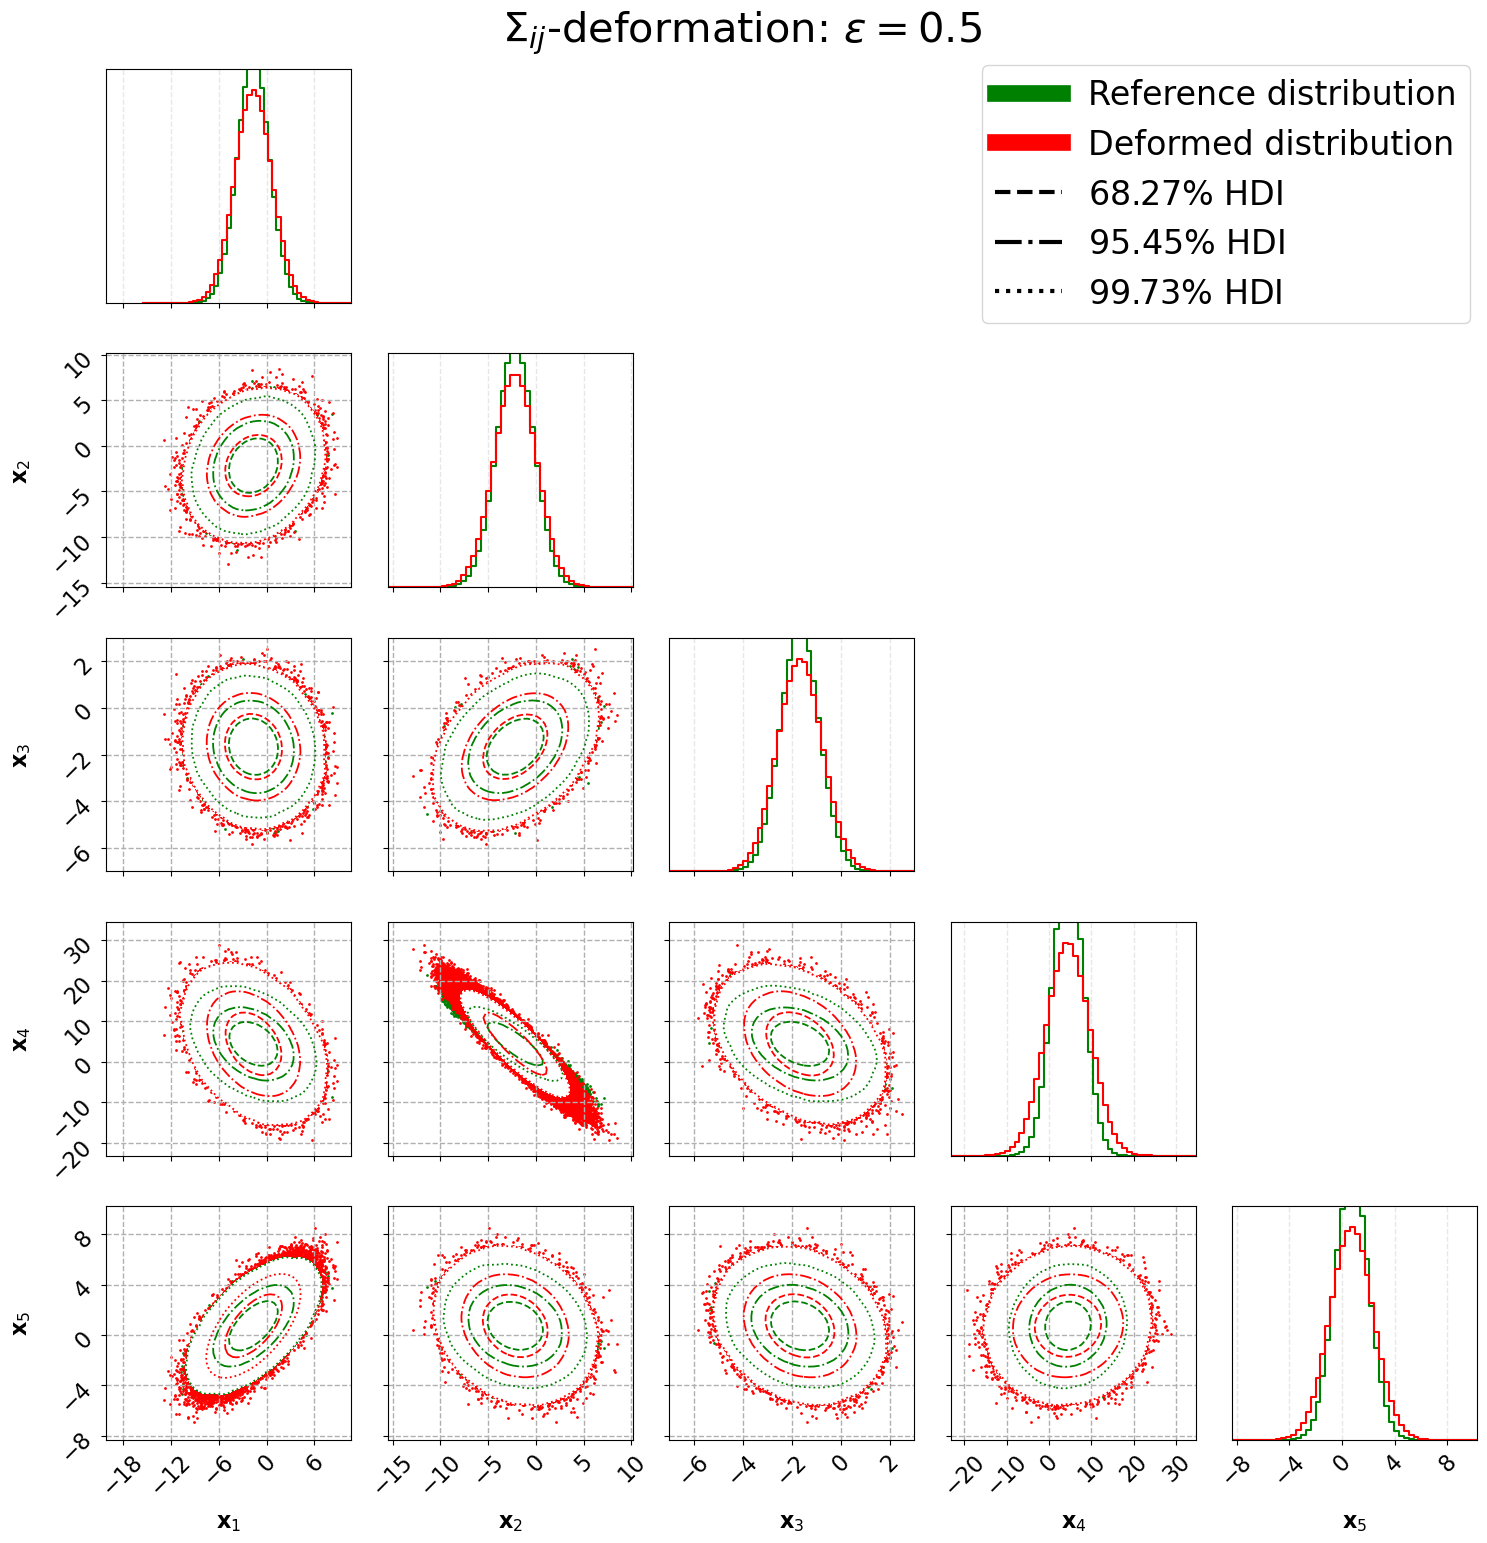

Plot done and saved in 22.18878872320056 s.


In [8]:
plot_corners(dist_1,
             dist_def_2,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_2.png",
             save = True,
             show = True)

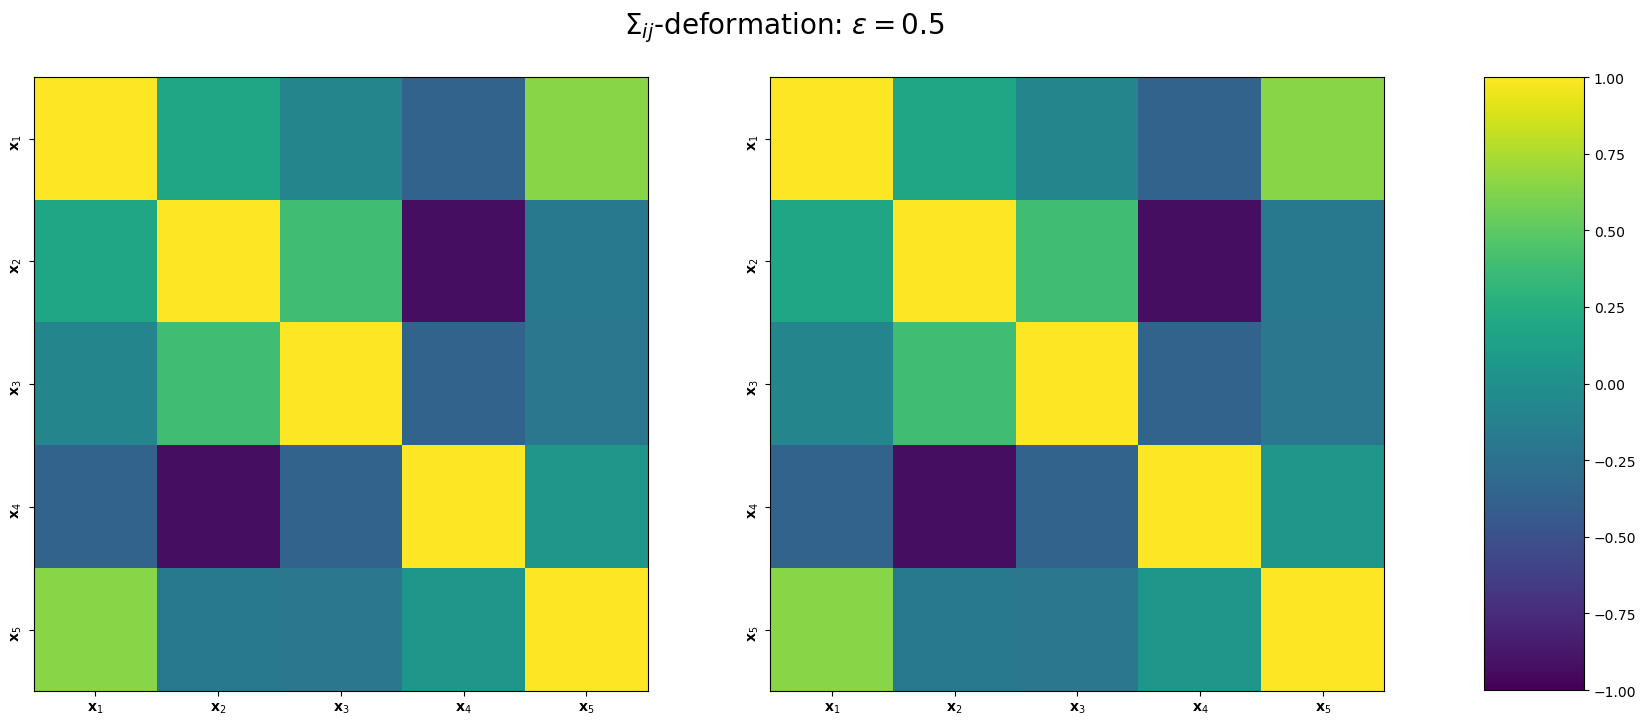

In [9]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_2, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_2.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 3 - $\Sigma_{i\neq j}$-deformation

In [10]:
eps = 0.5
dist_def_3 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_off_diag",
                                                shuffle_type = "random",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.020366842858493328 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.2555799996480346 s.
Computing HPD intervals...
HPD intervals computed in 6.221225509885699 s.
Computing HPD quotas...
HPD quotas computed in 2.749625838827342 s.
Plotting corner plot...


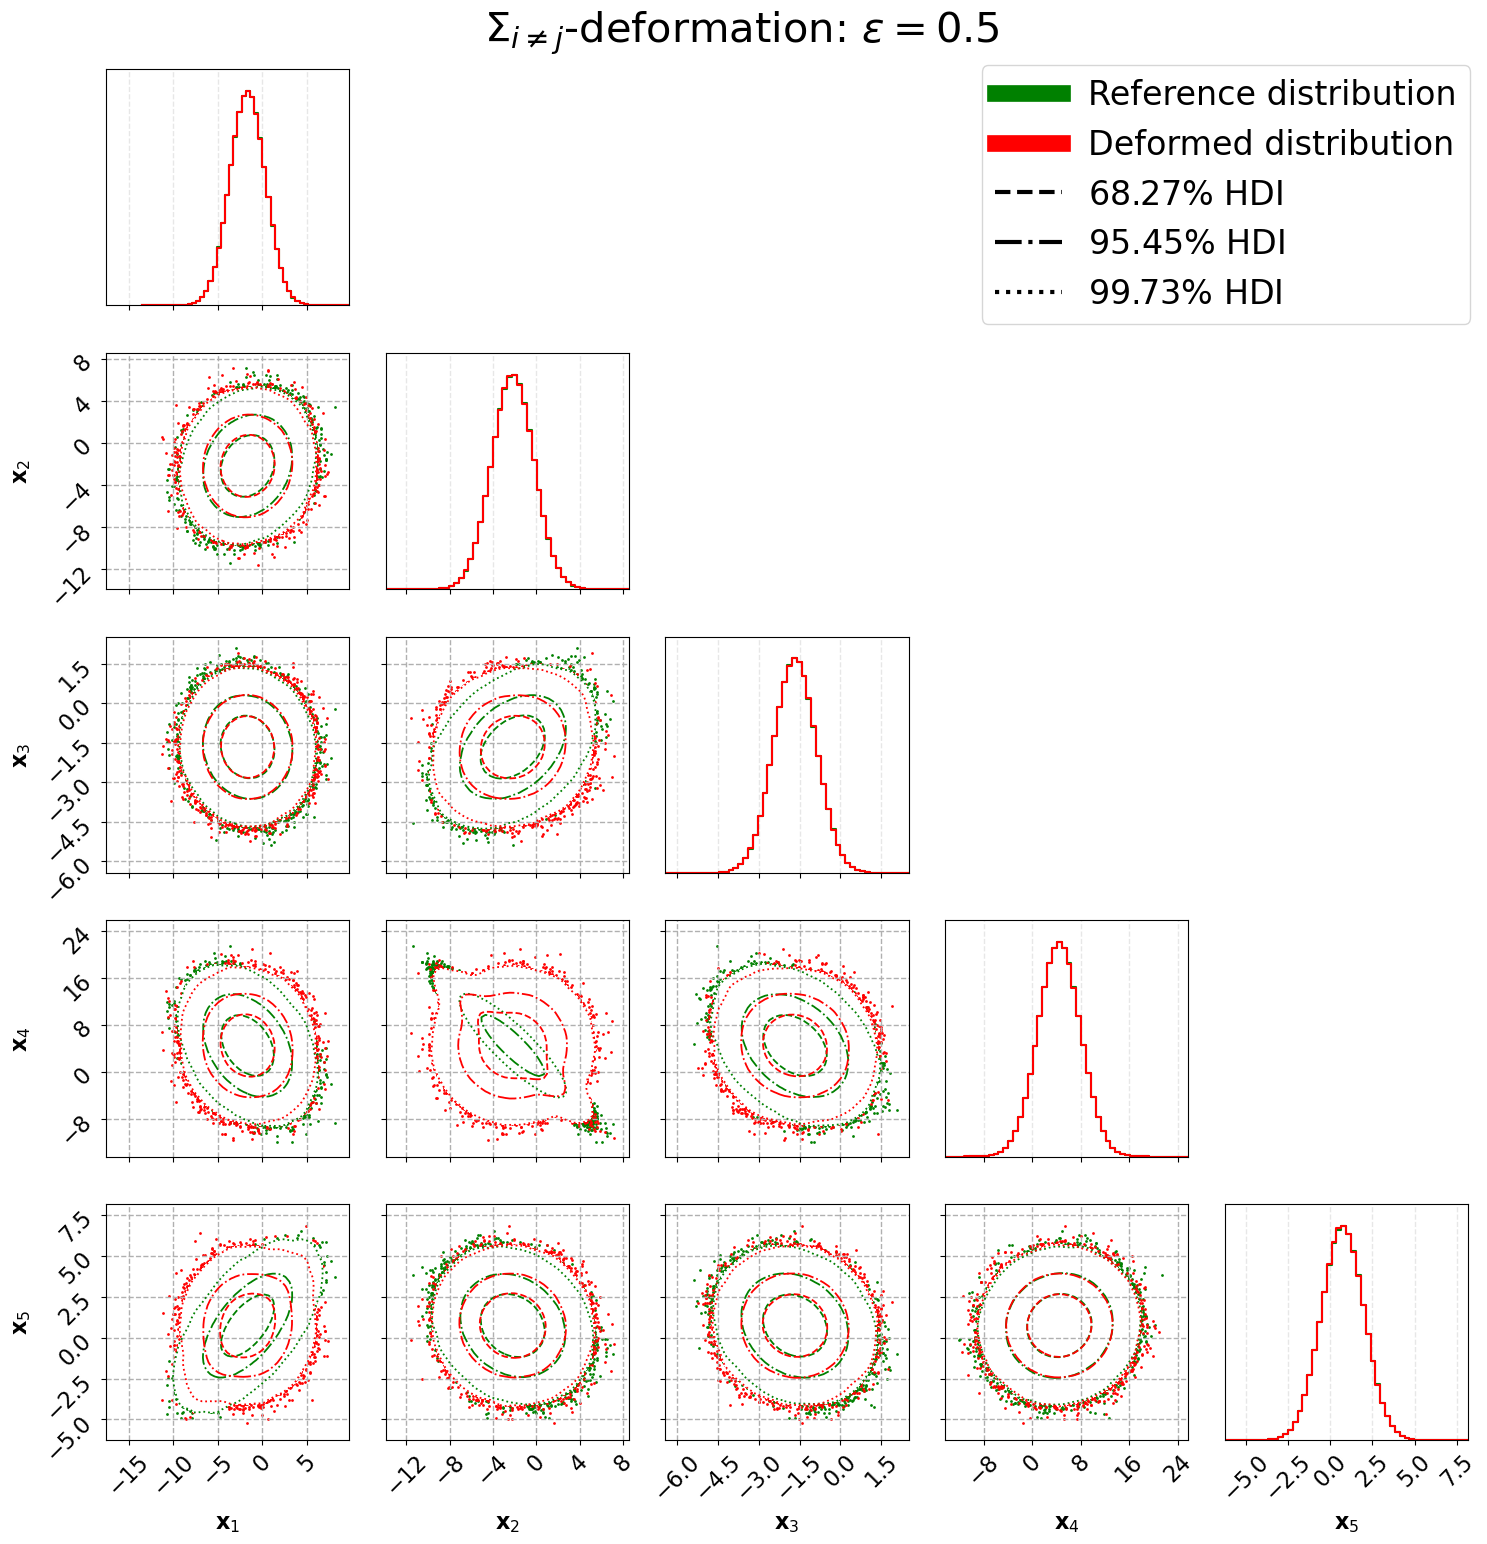

Plot done and saved in 20.11747970804572 s.


In [11]:
plot_corners(dist_1,
             dist_def_3,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_3.png",
             save = True,
             show = True)

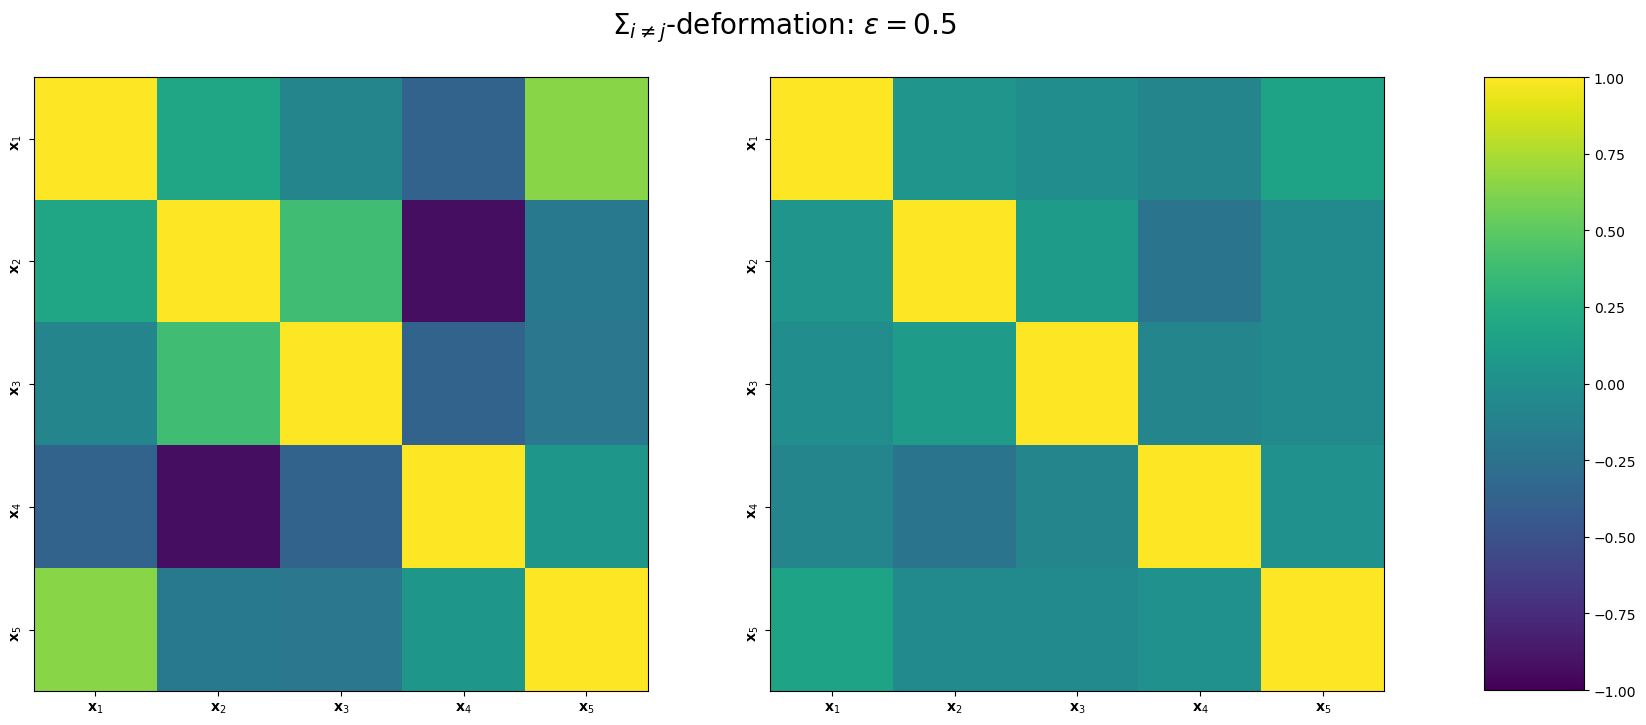

In [12]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_3, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_3.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 4 - pow$^{+}$-deformation

In [13]:
eps = 0.5
dist_def_4 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "up")

Sampling from dist_1...
Sampling from dist_1 done in 0.05211378401145339 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.10504526318982244 s.
Computing HPD intervals...
HPD intervals computed in 6.444868933875114 s.
Computing HPD quotas...
HPD quotas computed in 2.928220158908516 s.
Plotting corner plot...


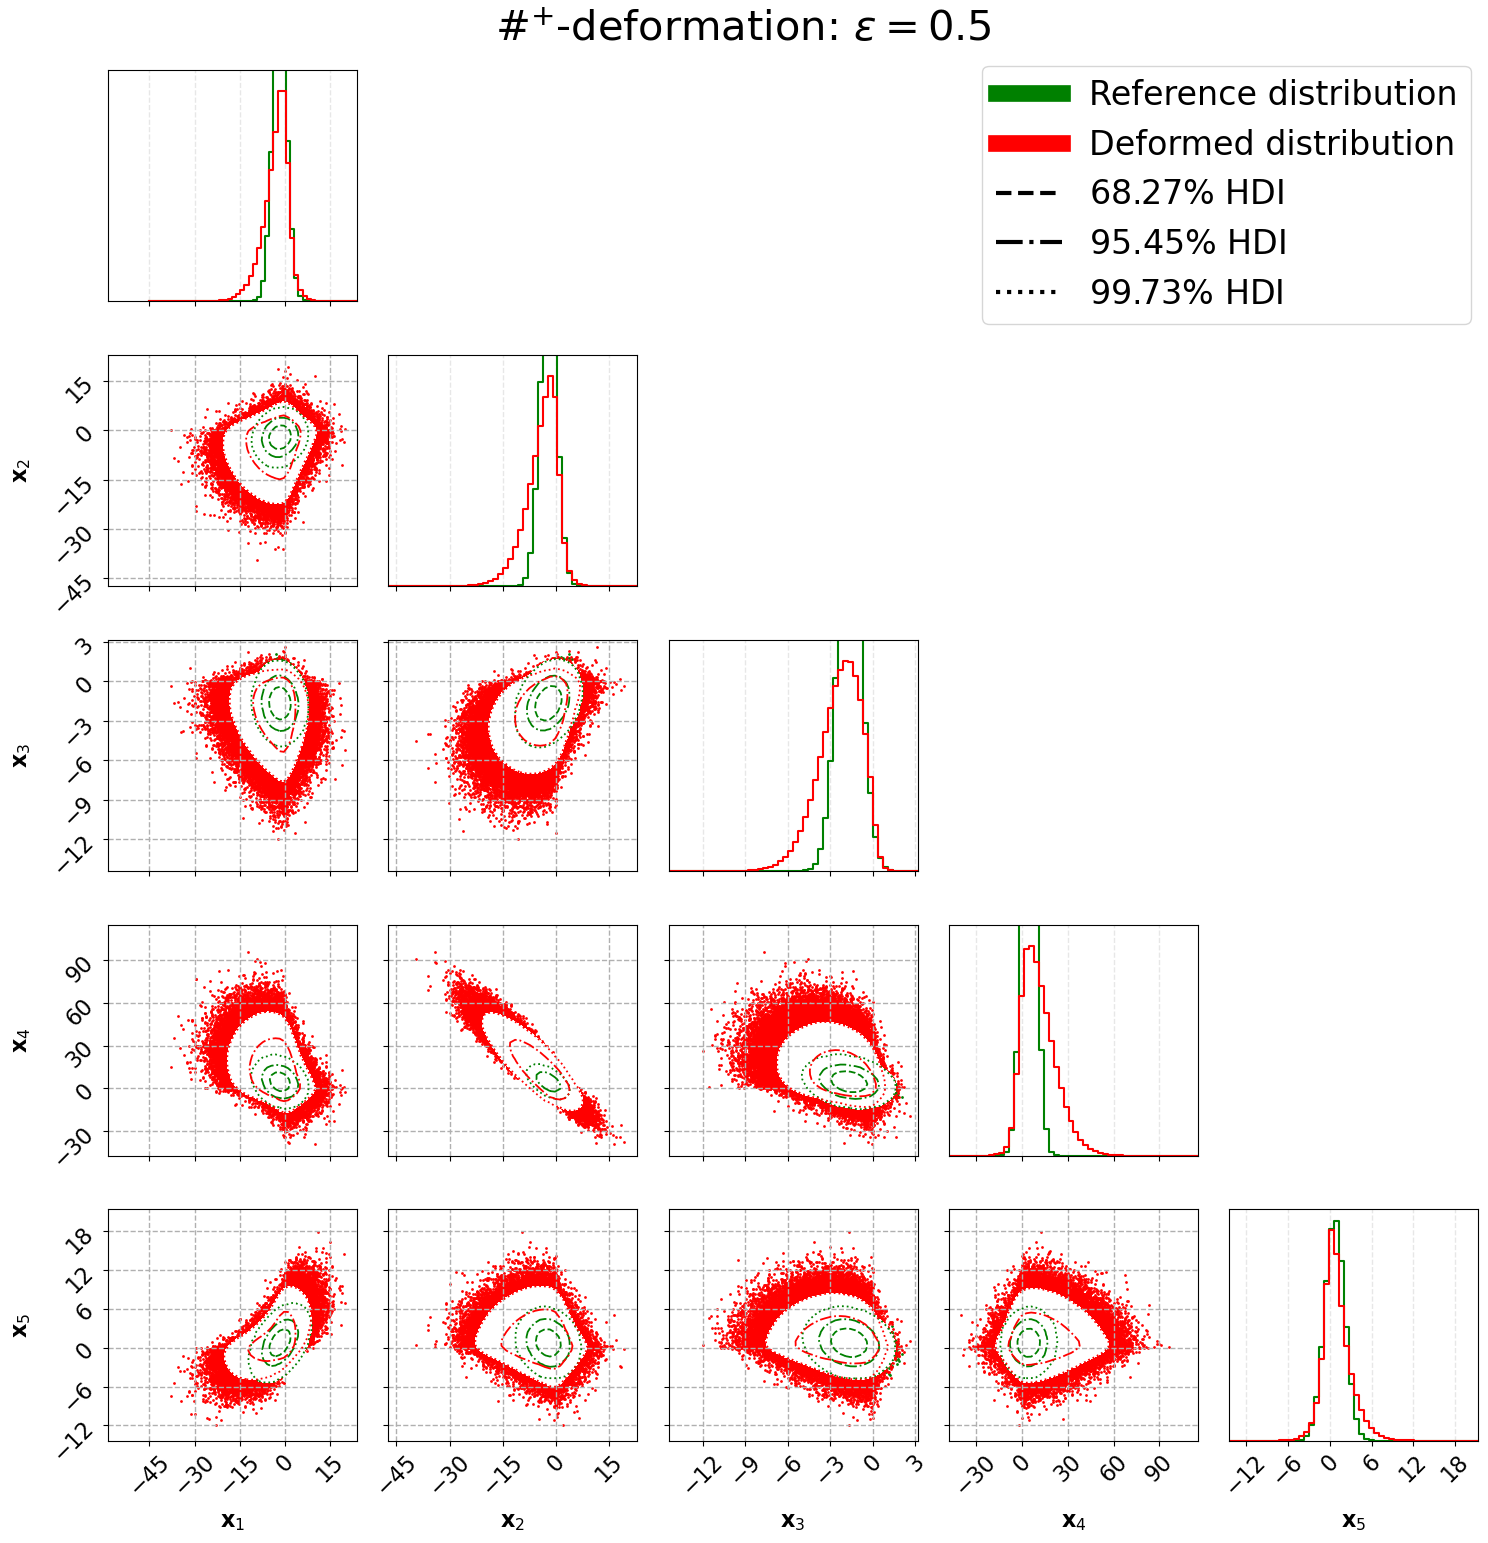

Plot done and saved in 22.028825912158936 s.


In [14]:
plot_corners(dist_1,
             dist_def_4,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\#^{+}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_4.png",
             save = True,
             show = True)

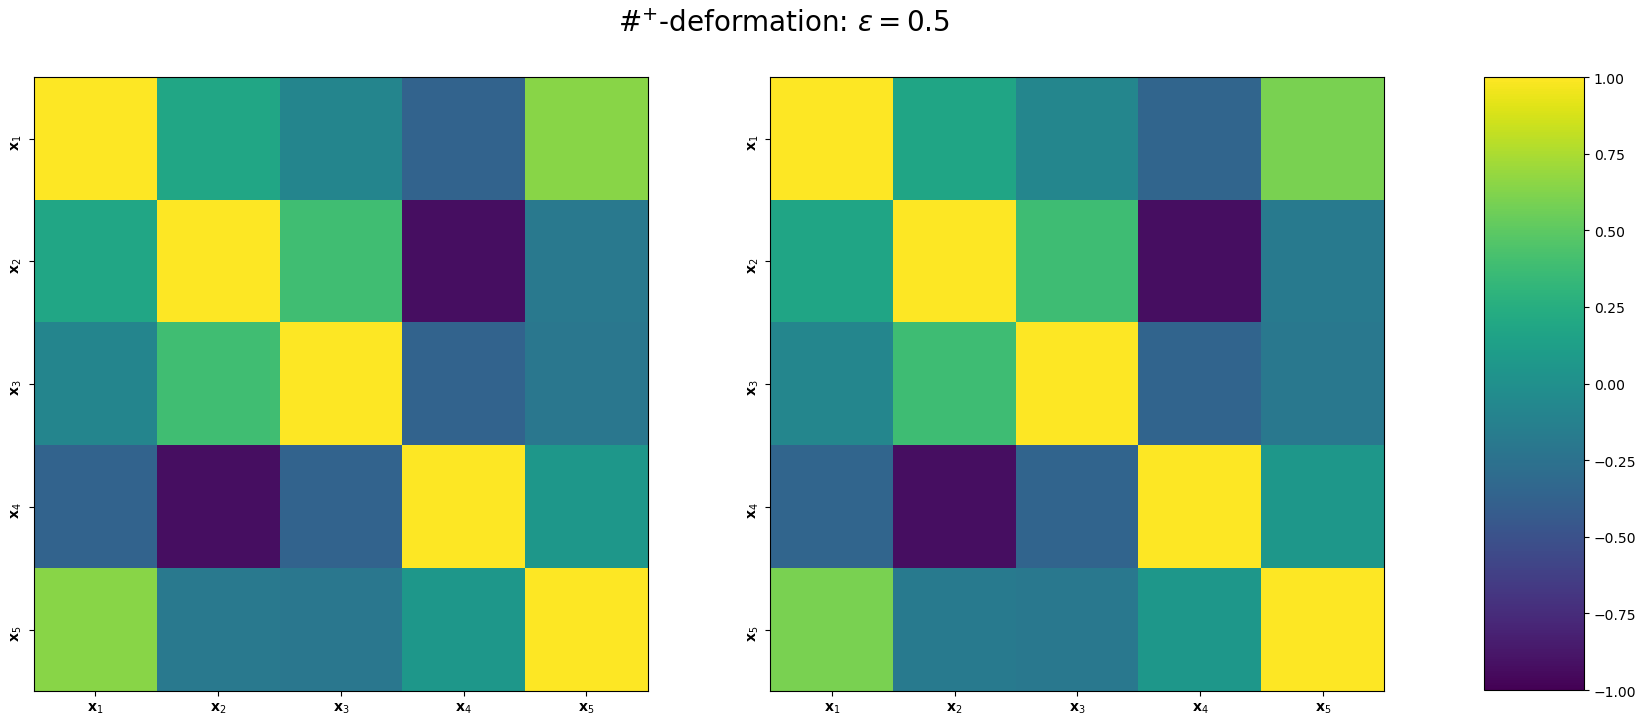

In [15]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_4, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_4.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\#^{+}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 5 - pow$^{-}$-deformation

In [16]:
eps = 0.5
dist_def_5 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "down")

Sampling from dist_1...
Sampling from dist_1 done in 0.026841382030397654 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.05751213524490595 s.
Computing HPD intervals...
HPD intervals computed in 4.400478288996965 s.
Computing HPD quotas...
HPD quotas computed in 4.230472802184522 s.
Plotting corner plot...


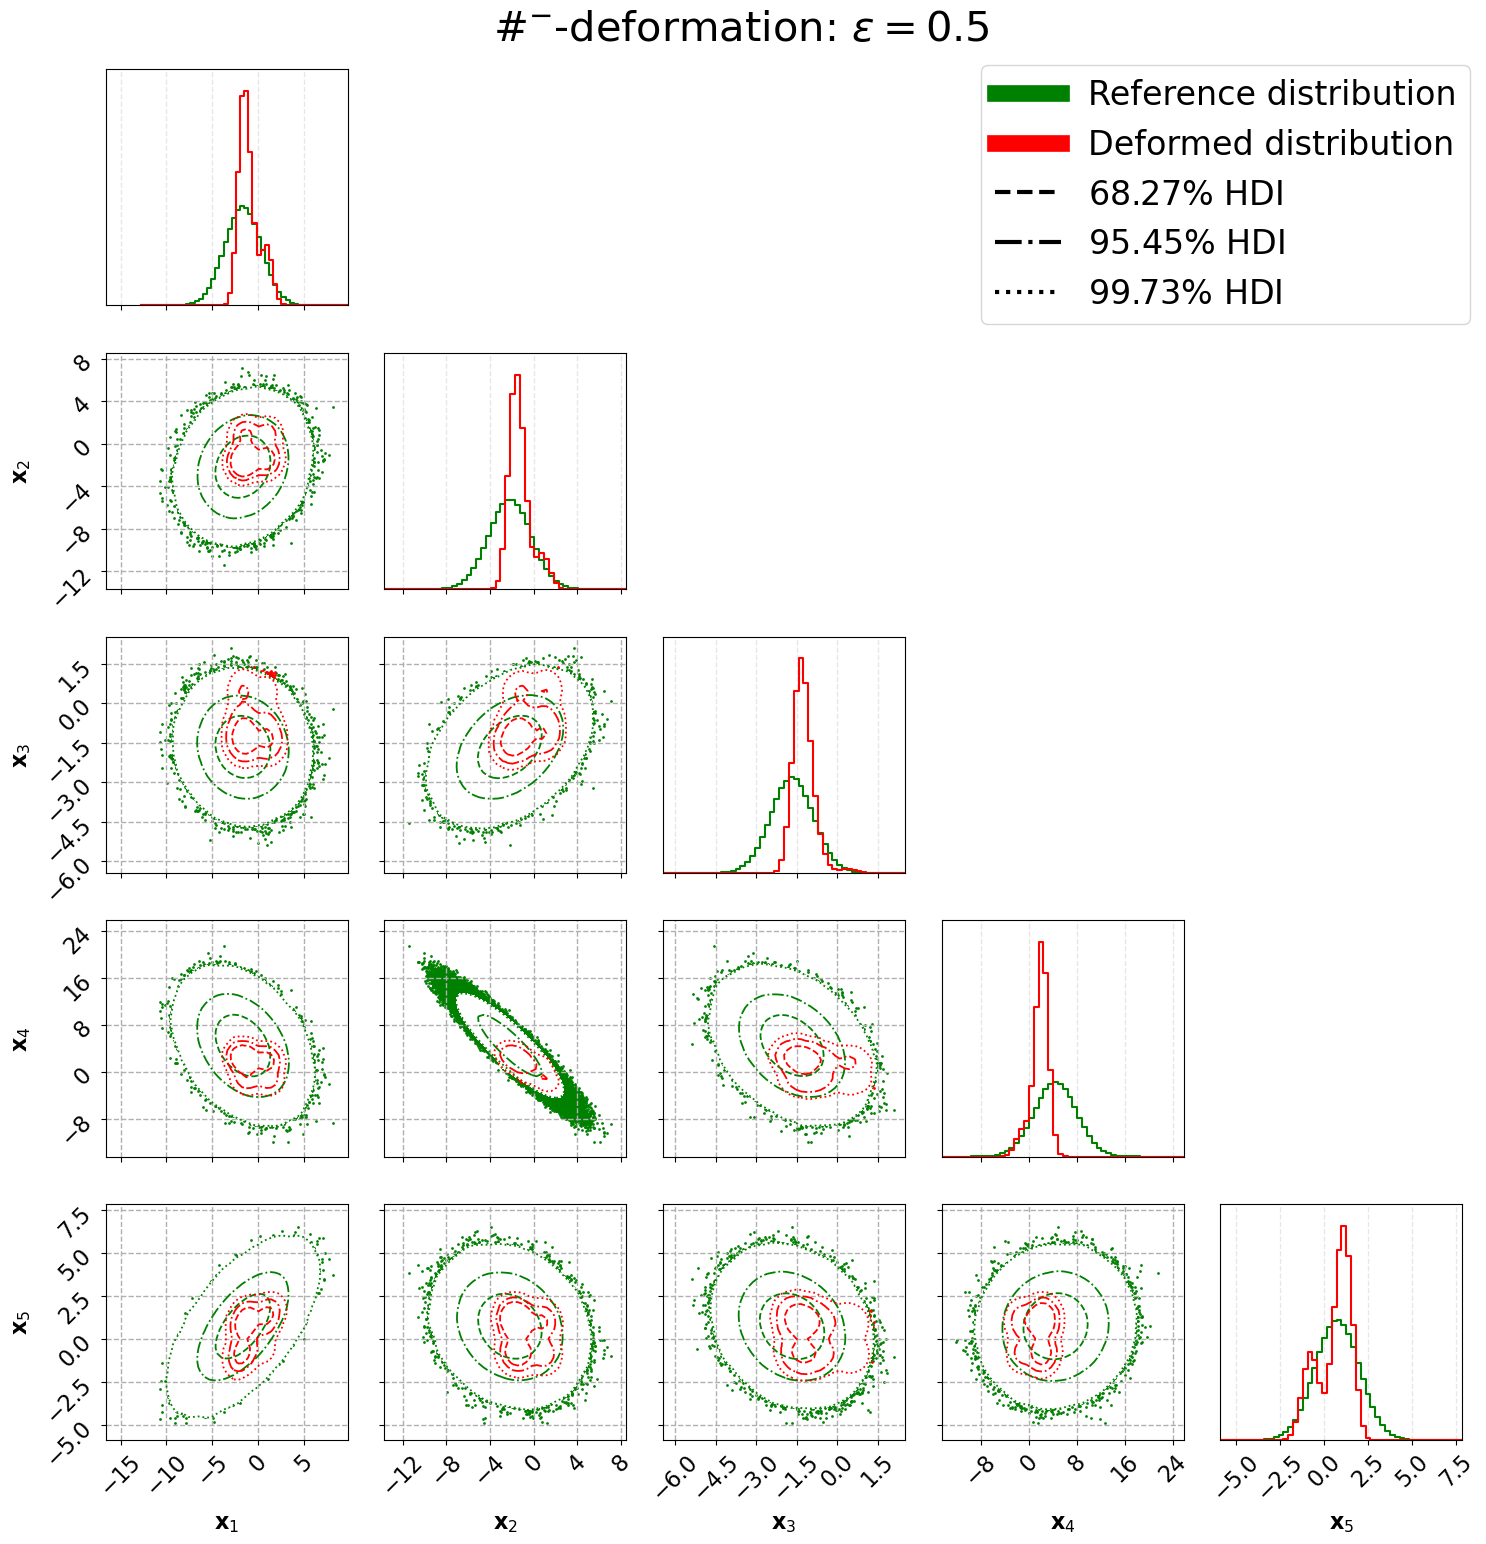

Plot done and saved in 20.120714031159878 s.


In [17]:
plot_corners(dist_1,
             dist_def_5,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_5.png",
             save = True,
             show = True)

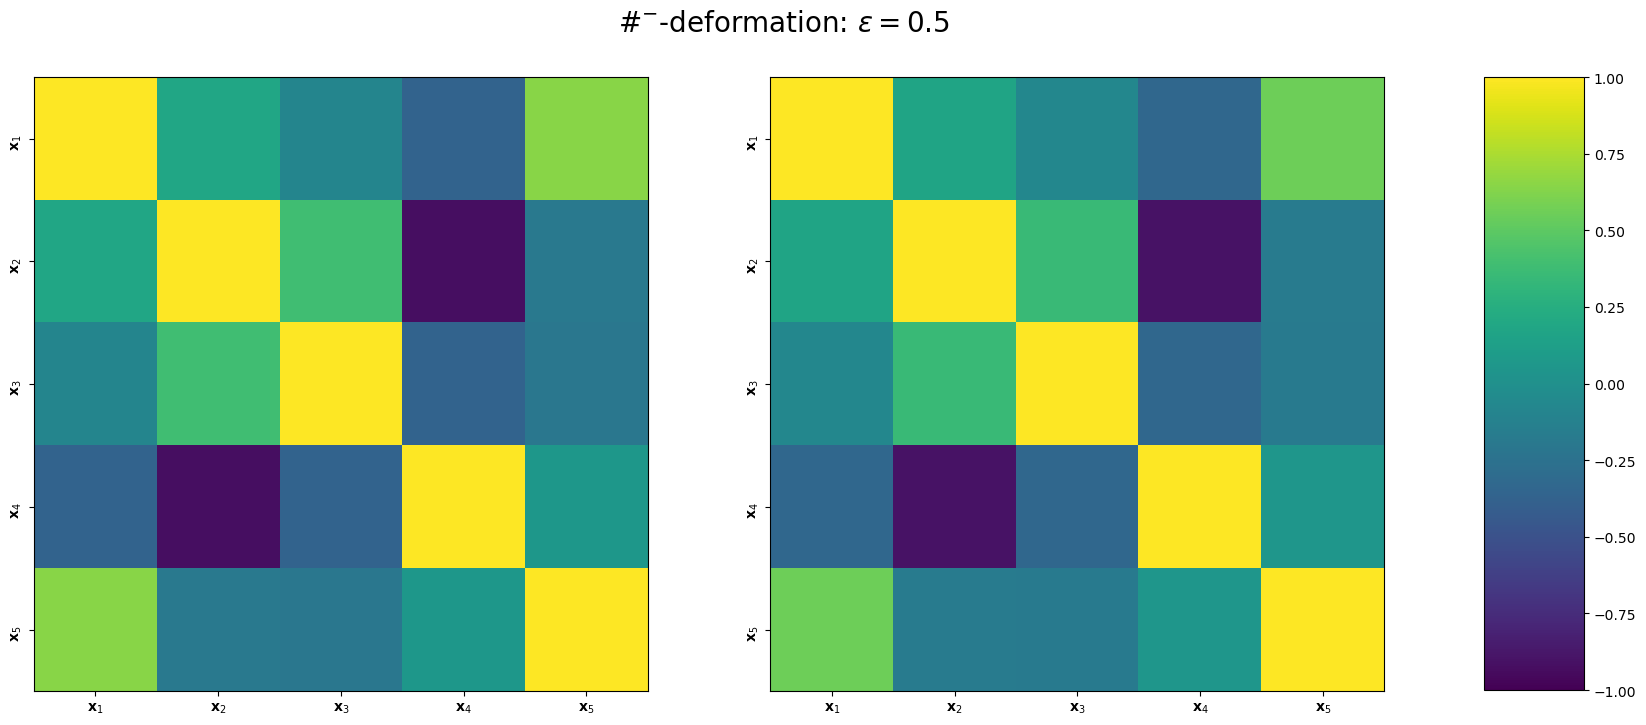

In [18]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_5, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_5.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 6 - $\mathcal{N}$-deformation

In [19]:
eps = 0.5
dist_def_6 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "normal",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.017398149240761995 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.0165873640216887 s.
Computing HPD intervals...
HPD intervals computed in 6.401857707649469 s.
Computing HPD quotas...
HPD quotas computed in 2.754531437996775 s.
Plotting corner plot...


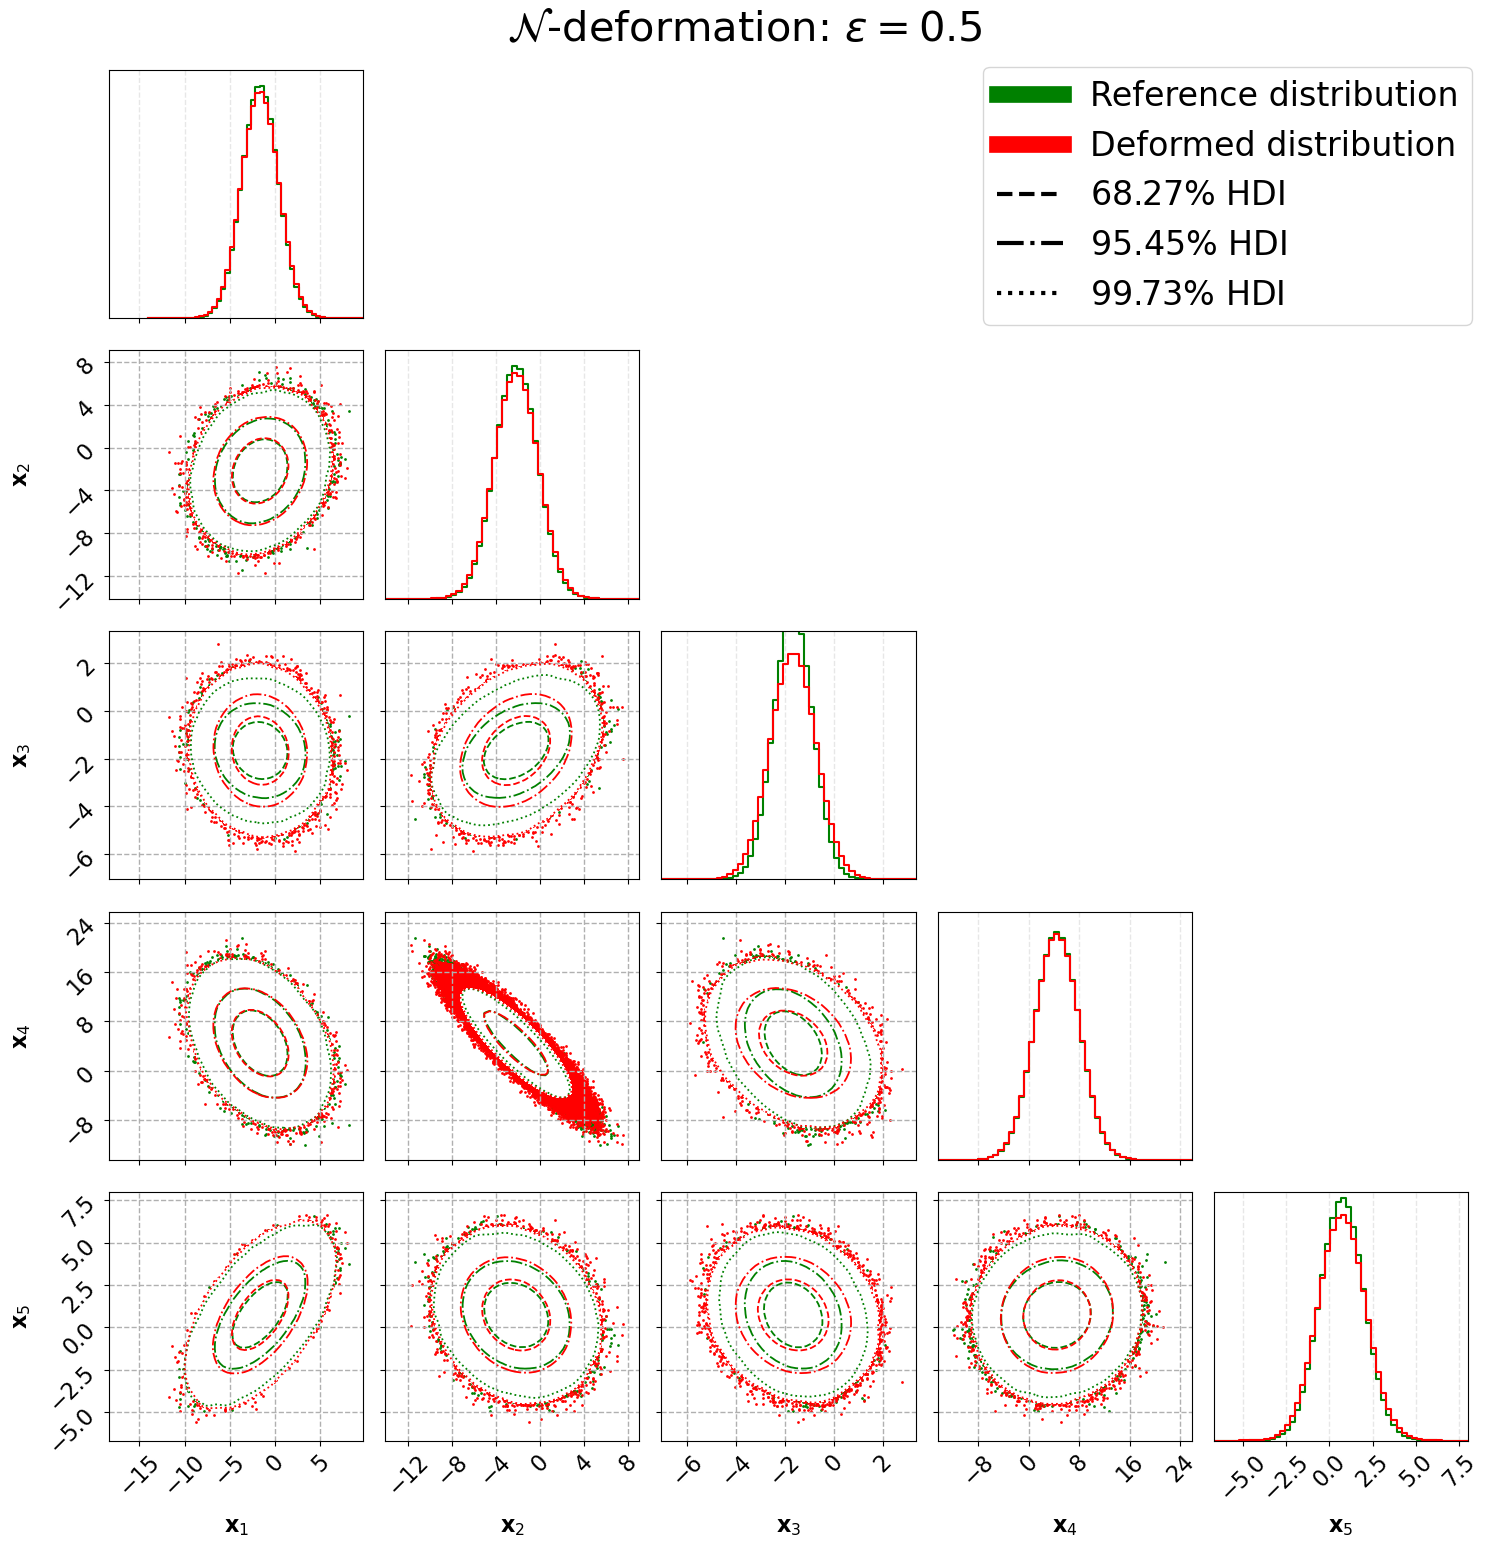

Plot done and saved in 19.2180089186877 s.


In [20]:
plot_corners(dist_1,
             dist_def_6,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_6.png",
             save = True,
             show = True)

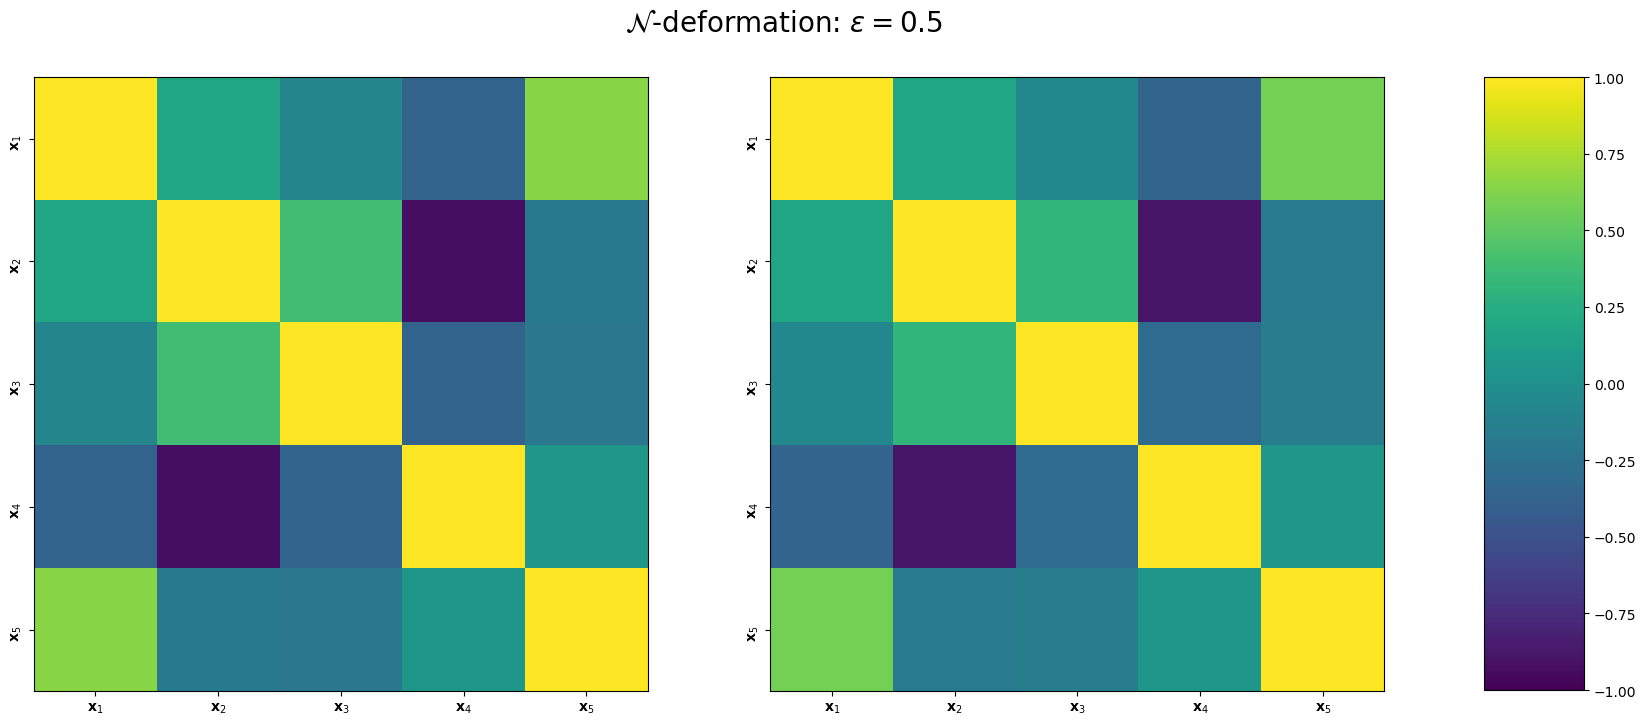

In [21]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_6, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_6.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 7 - $\mathcal{U}$-deformation

In [22]:
eps = 0.5
dist_def_7 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "uniform",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.017597963102161884 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.013783202972263098 s.
Computing HPD intervals...
HPD intervals computed in 6.371820946224034 s.
Computing HPD quotas...
HPD quotas computed in 2.75270564481616 s.
Plotting corner plot...


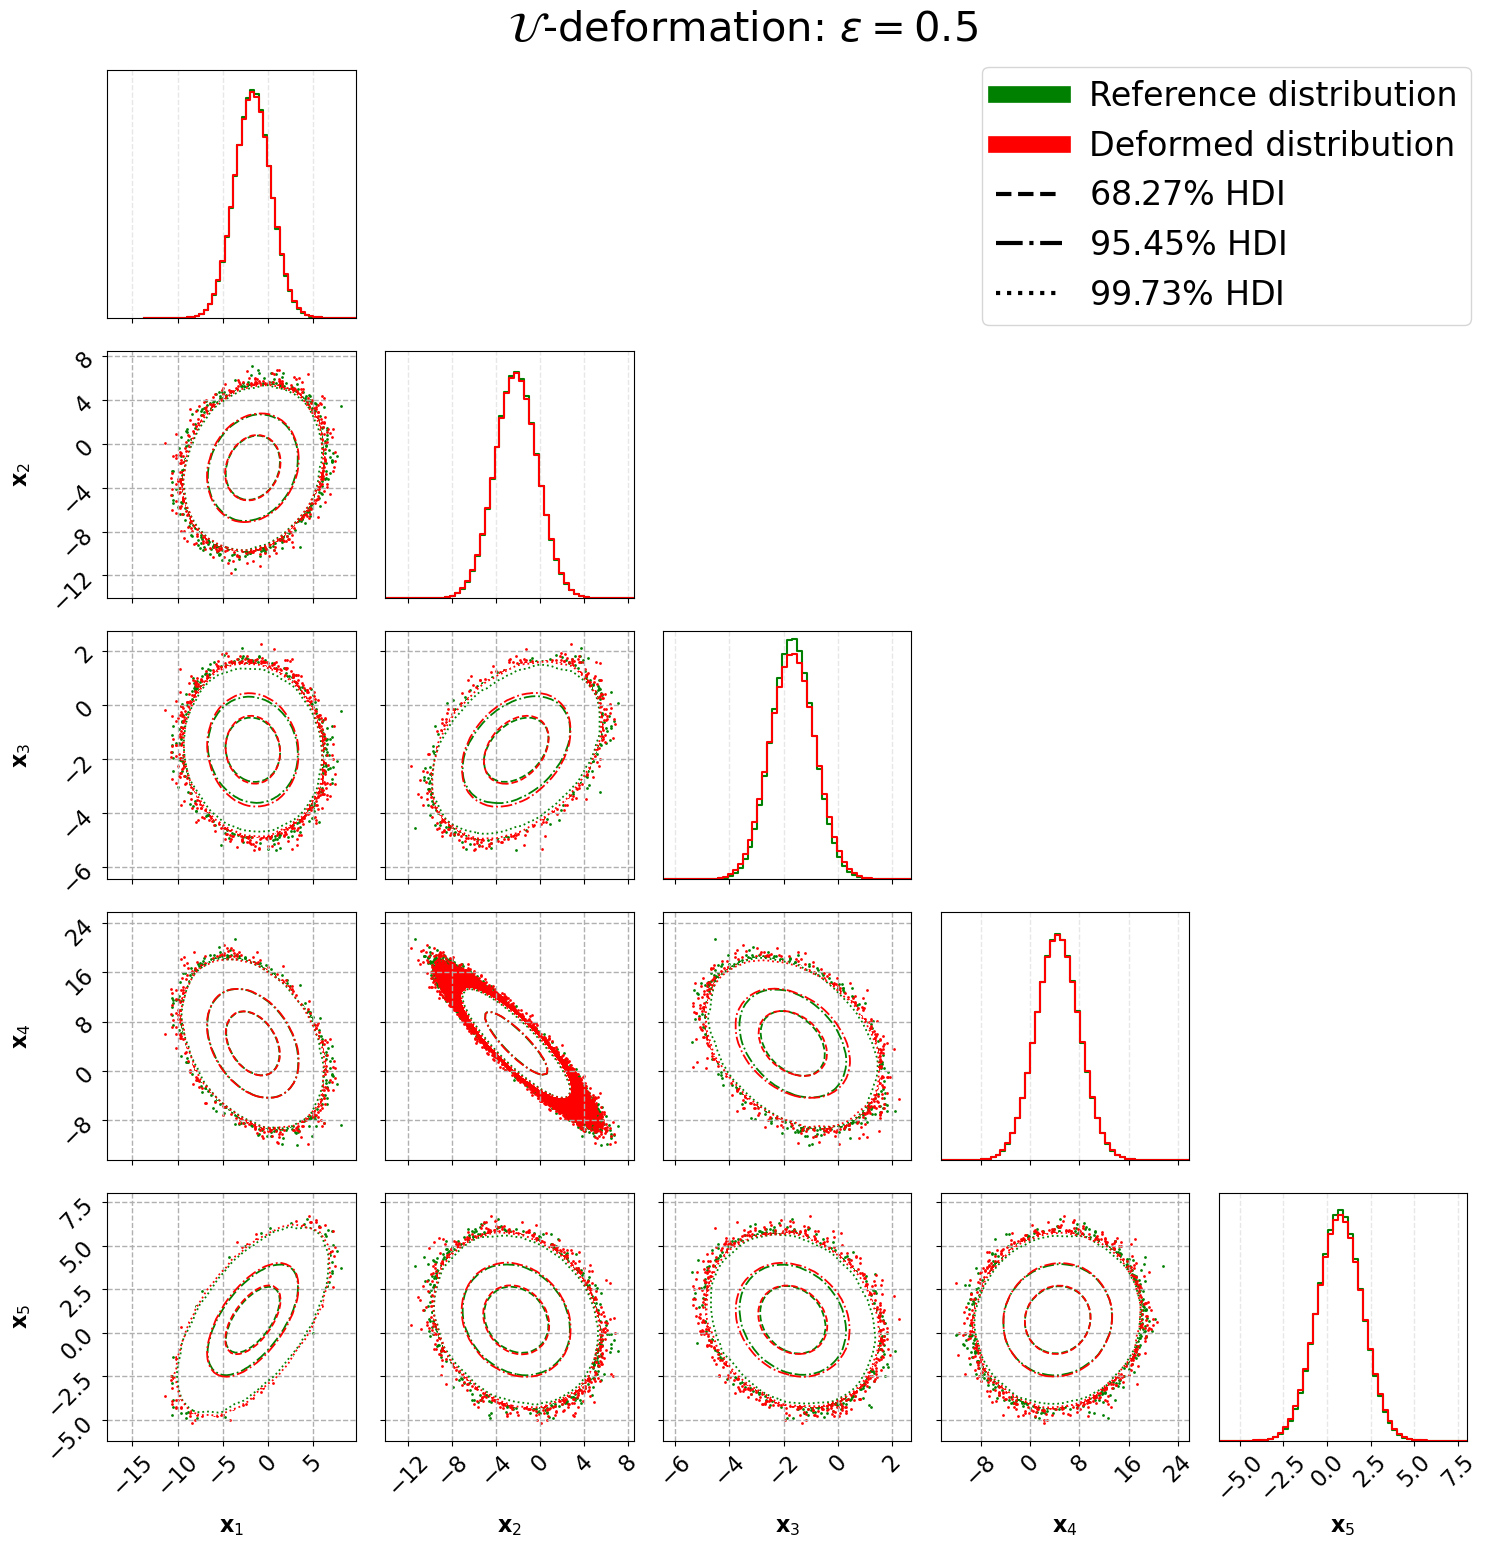

Plot done and saved in 19.70031806314364 s.


In [23]:
plot_corners(dist_1,
             dist_def_7,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_7.png",
             save = True,
             show = True)

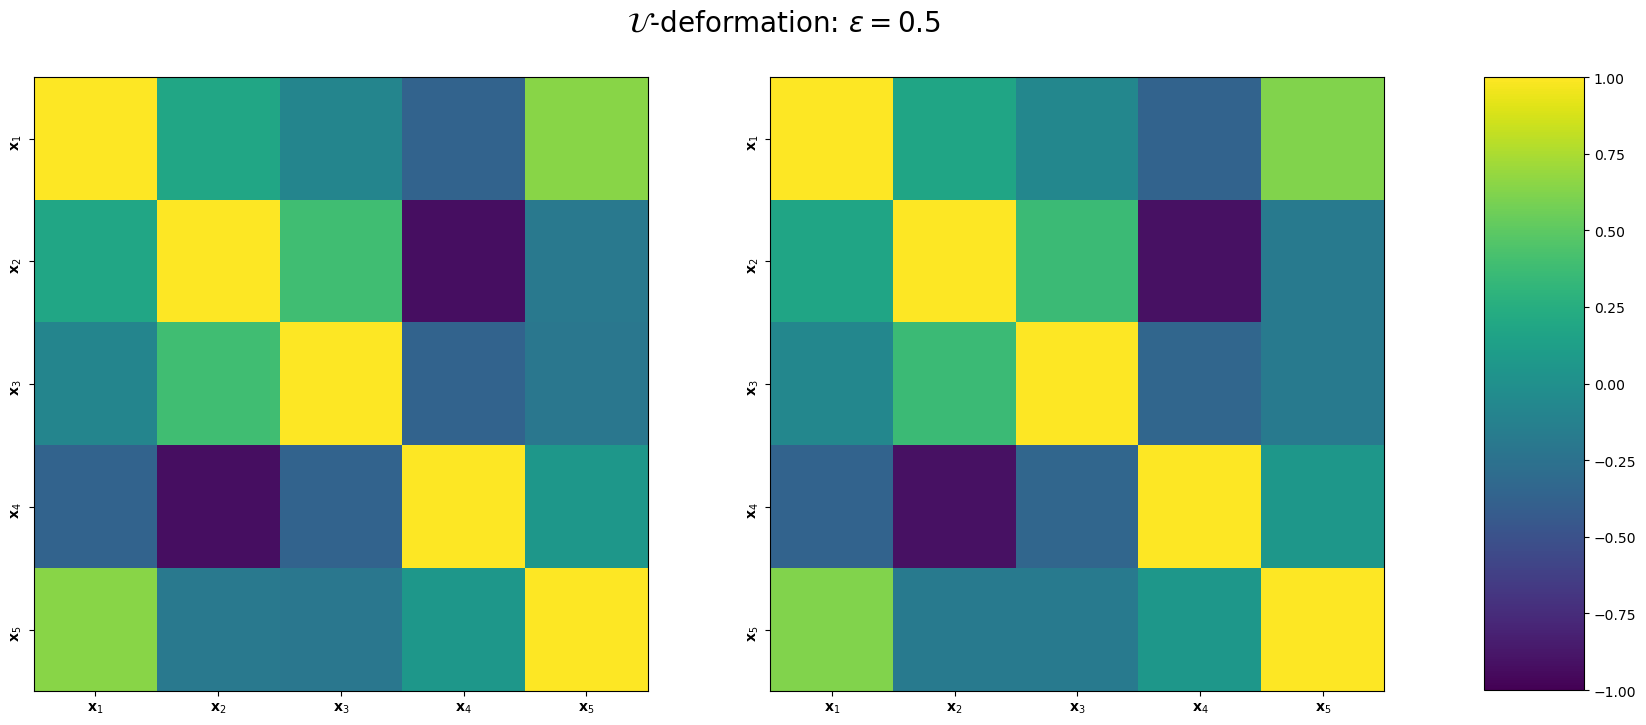

In [24]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_7, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_7.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)